In [12]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.linear_model import LogisticRegression
import pickle

In [13]:
with open('credit.pkl', 'rb') as f:
    X_credit_treino, y_credit_treino, X_credit_teste, y_credit_teste = pickle.load(f)

with open('census.pkl', 'rb') as f:
    X_census_treino, y_census_treino, X_census_teste, y_census_teste = pickle.load(f)
    
with open('risco_credito.pkl', 'rb') as f:
    X_risco_credito, y_risco_credito = pickle.load(f)

In [14]:
X_risco_credito = np.delete(X_risco_credito, [2, 7, 11], axis = 0)
y_risco_credito = np.delete(y_risco_credito, [2, 7, 11], axis = 0)

In [15]:
logistic_risco_credito = LogisticRegression(random_state = 1)
logistic_risco_credito.fit(X_risco_credito, y_risco_credito)

previsoes1 = logistic_risco_credito.predict([[0,0,1,2], [2,0,0,0]])
print(previsoes1)

['baixo' 'alto']


## Base de dados credito

0.946
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       436
           1       0.79      0.78      0.79        64

    accuracy                           0.95       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.95      0.95      0.95       500



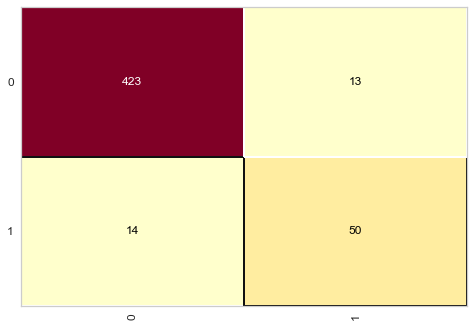

In [18]:
logistic_credit = LogisticRegression(random_state=1)
logistic_credit.fit(X_credit_treino, y_credit_treino)
previsoes = logistic_credit.predict(X_credit_teste)

print(accuracy_score(y_credit_teste, previsoes))

cm = ConfusionMatrix(logistic_credit)
cm.fit(X_credit_treino, y_credit_treino)
cm.score(X_credit_teste, y_credit_teste)

print(classification_report(y_credit_teste, previsoes))

## Base de dados census

0.849539406345957
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.73      0.61      0.66      1192

    accuracy                           0.85      4885
   macro avg       0.80      0.77      0.78      4885
weighted avg       0.84      0.85      0.84      4885



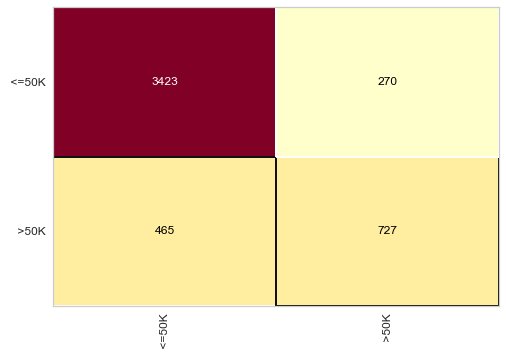

In [21]:
logistic_census = LogisticRegression(random_state=1)
logistic_census.fit(X_census_treino, y_census_treino)
previsoes = logistic_census.predict(X_census_teste)

print(accuracy_score(y_census_teste, previsoes))

cm = ConfusionMatrix(logistic_census)
cm.fit(X_census_treino, y_census_treino)
cm.score(X_census_teste, y_census_teste)

print(classification_report(y_census_teste, previsoes))